In [70]:
# Testing out the new virtualenvironment, sparkenv
# which you can activate from this directory 
# via the command `source sparkenv/bin/activate`

import networkx as nx
import numpy as np
import scipy as sp


In [71]:
# fast_gnp_random_graph(n, p, seed=None, directed=False)
n = 100 # number of nodes
p = 0.1 # edge probability
G = nx.fast_gnp_random_graph( n, p )
A = nx.adjacency_matrix(G).astype('double') # linear algebra functions require matrix to be type 'double'

In [141]:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigsh.html#scipy.sparse.linalg.eigsh
# scipy.sparse.linalg.eigsh(A, k=6, M=None, sigma=None, which='LM', v0=None, ncv=None, maxiter=None, tol=0, return_eigenvectors=True, Minv=None, OPinv=None, mode='normal')
from scipy import sparse

# For some reason this function cannot return all n eigenvalues !?
# So we construct a way around this below
lams, vecs = sparse.linalg.eigsh(A, k=n-1)

'''
For some reason scipy can't compute the full eigen decomposition,
so we're going to complete it! This requires converting vecs
to a matrix, first, then getting the complement W = vecs*vecs^T - identity
'''
I = sp.sparse.identity(n, dtype='d', format='csr')
vecs = sp.matrix(vecs)
W = vecs*(vecs.transpose()) - I
w = W[:,0]

# make w a unit vector
# This cell should output '1.0' (norm of vector w after normalization)
wnorm = sp.transpose(w)*w
wnorm = np.sqrt(np.asscalar(wnorm))
w = w/wnorm
wnorm = sp.transpose(w)*w
wnorm = np.asscalar(wnorm)
wnorm

# Demonstrate w is orthogonal to the other eigenvectors
# (output should be near zero)
check_vecs = vecs.transpose()*w
np.asscalar(max(check_vecs))


2.8727020762175925e-15

In [148]:
vecs = np.asarray(vecs)
vecs.shape

(100, 99)

In [149]:
w.shape

(100, 1)

In [150]:
vecs = np.append(vecs, w, axis=1)
vecs.shape

(100, 100)

In [152]:
# At last, we can check that our (now square) eigen-vector matrix is orthogonal
# Output should be near 0:
vecs = sp.matrix(vecs)
check_mat = vecs*sp.transpose(vecs)
sp.linalg.norm( I -  check_mat , ord=2 )

1.2163994859925966e-14

In [155]:
#Add new eigenvalue to 'lams'
new_eig = sp.transpose(w)*(A*w)
print(new_eig)
lams = np.append(lams, np.asscalar(new_eig))
lams = sorted(lams)

[[-0.00561967]]


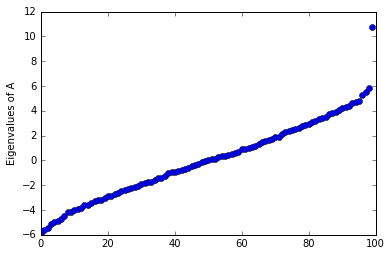

In [156]:
# Now display the eigenvalues !
import matplotlib.pyplot as plt
plt.plot( range(len(lams)), lams, 'bo' )
plt.ylabel('Eigenvalues of A')
plt.show()

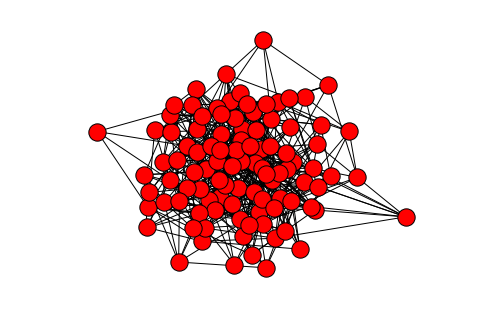

In [157]:
nx.draw(G)
plt.show()

In [159]:
degs = sum(A).todense()
#max(degs)
degs = np.squeeze(np.asarray(degs)) # convert from matrix to array, 'squeeze' removes 0-dimensional axes of the array
max(degs)

19.0

In [160]:
# http://networkx.readthedocs.io/en/networkx-1.11/reference/generated/networkx.algorithms.core.core_number.html#networkx.algorithms.core.core_number
corenums = nx.core_number(G)
kcore = max(corenums.values())
kcore

7

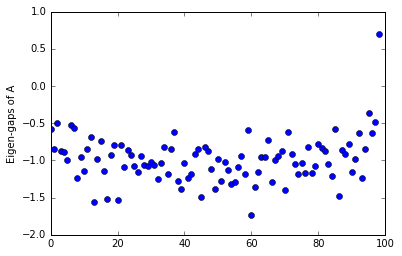

In [164]:
# Check gaps between consecutive eigenvalues

gaps = []
for j in range(len(lams)-1):
    gaps.append( lams[j+1] - lams[j] )

plt.plot( range(len(gaps)), sp.log10(gaps), 'bo' )
plt.ylabel('Eigen-gaps of A')
plt.show()